In [1]:
!pip install emnist

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from keras.utils import to_categorical
import emnist
import numpy as np

In [3]:
images_byclass, labels_byclass = emnist.extract_training_samples('byclass')

In [4]:
print("ByClass Split - Images:", images_byclass.shape, "Labels:", labels_byclass.shape)

ByClass Split - Images: (697932, 28, 28) Labels: (697932,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    images_byclass, labels_byclass, test_size=0.2, random_state=42
)

In [7]:
len(np.unique(y_train))

62

In [8]:
x_train.shape

(558345, 28, 28)

In [9]:
x_test.shape

(139587, 28, 28)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
x_train = x_train.reshape((558345, 28, 28, 1))
x_test = x_test.reshape((139587,28,28,1))

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
# Build the model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(62,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 32)        128       
 chNormalization)                                                
                                                        

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
def generator(X, y, batch_size=64):
    """Generator for handwritten digit recognition model."""
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    while True:
        for i in range(0, len(X), batch_size):
            batch_indices = indices[i:i+batch_size]
            yield X[batch_indices], y[batch_indices]

In [22]:
history = model.fit(generator(x_train,y_train), epochs=5, validation_data=generator(x_test,y_test))

Epoch 1/5
 104518/Unknown - 560s 5ms/step - loss: 0.3267 - accuracy: 0.8756

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

780/780 [==============================] - 3s 3ms/step - loss: 0.2058 - accuracy: 0.9324
Test accuracy: 0.9323717951774597


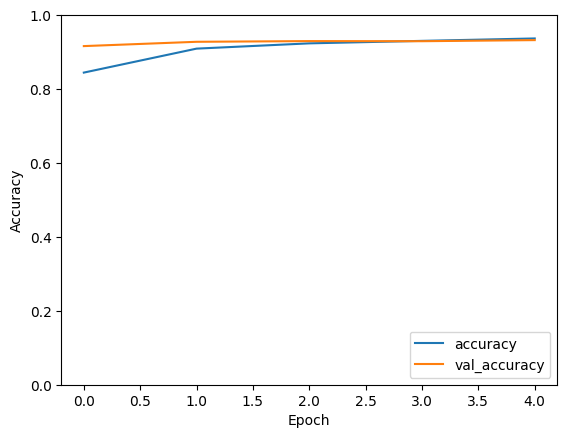

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import string

In [ ]:
# Create a list of all small letters
small_letters = list(string.ascii_lowercase)
small_letters.insert(0,'N/A')

In [ ]:
def image_preprocess(image_path):
  #convert to gray scale
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)/255

  image = cv2.resize(image,(28,28))

  image = image.reshape((1,28,28,1))

  return image

In [ ]:
def image_prediction(image_path):
  image = image_preprocess(image_path)

  prediction = model.predict(image)

  ans = np.where(prediction == prediction.max())

  print(f"The prediction of image is {small_letters[ans[1][0]]}")

In [ ]:
img_path = '/content/words.jpg'
image_prediction(img_path)

1/1 [==============================] - 0s 18ms/step
The prediction of image is o
